In [31]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools    
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor

In [32]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [46]:
def read_cs_md(data):
 confd = { 'HA': { },
          'CA': { },
          'CB': { },
          'C': { },
          'H': { },
          'HA2':{ },
          'HA3':{ },
          'N': { }}
 for lines in open(data, "r").readlines():
        riga=lines.strip().split(",")
        #riga=lines.strip().split(" ")
        # key dictionary
        key=riga[0]
        key2=riga[1]
        confd[key2][key]=[] 
        timeseries=np.asarray(riga[2:]).astype(float)
        confd[key2][key]=timeseries
 return(confd)

def read_exp_cs(data):
 confd = { 'HA': { },
          'CA': { },
          'CB': { },
          'C': { },
          'H': { },
          'HA2':{ },
          'HA3':{ },
          'N': { }}
 for lines in open(data, "r").readlines():
        #riga=lines.strip().split(",")
        riga=lines.strip().split(" ")
        # key dictionary
        key=riga[0]
        key2=riga[1]
        confd[key2][key]=[]
        confd[key2][key] += map(float, [float(riga[2])])
 return(confd)


def add_exp_data(data,dict,key):
  dict[key]={}
  for lines in open(data, "r").readlines():
        #riga=lines.strip().split(",")
        riga=lines.strip().split(" ")
        key2=riga[0]
        dict[key][key2]=[]
        dict[key][key2] += map(float, [float(riga[1])])
  return(dict)



In [47]:
#outdir=sys.argv[1]
#datadir=sys.argv[2]
#expdatadir=sys.argv[3]
outdir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/FullLength/NewFigures'
expdatadir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/FullLength/Exp_Data'
MDdatadir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/FullLength/MD_Data'
apodata_dir=MDdatadir+'/Apo'
data41_dir=MDdatadir+'/Lig41'
data47_dir=MDdatadir+'/Lig47'

if not os.path.exists(outdir):
    os.makedirs(outdir)


In [48]:
expdata=read_exp_cs(expdatadir+'/CS.exp.dat')
expdata=add_exp_data(expdatadir+'/RDC.exp.dat',expdata,'RDC')
expdata=add_exp_data(expdatadir+'/JCC.exp.dat',expdata,'JCC')
expdata=add_exp_data(expdatadir+'/JHNHA.exp.dat',expdata,'JHNHA')
expdata=add_exp_data(expdatadir+'/Iratio-label-18.exp.dat',expdata,'PRE_18')
expdata=add_exp_data(expdatadir+'/Iratio-label-20.exp.dat',expdata,'PRE_20')
expdata=add_exp_data(expdatadir+'/Iratio-label-24.exp.dat',expdata,'PRE_24')
expdata=add_exp_data(expdatadir+'/Iratio-label-42.exp.dat',expdata,'PRE_42')
expdata=add_exp_data(expdatadir+'/Iratio-label-62.exp.dat',expdata,'PRE_62')
expdata=add_exp_data(expdatadir+'/Iratio-label-76.exp.dat',expdata,'PRE_76')
expdata=add_exp_data(expdatadir+'/Iratio-label-85.exp.dat',expdata,'PRE_85')
expdata=add_exp_data(expdatadir+'/Iratio-label-87.exp.dat',expdata,'PRE_87')
expdata=add_exp_data(expdatadir+'/Iratio-label-90.exp.dat',expdata,'PRE_90')
expdata=add_exp_data(expdatadir+'/Iratio-label-103.exp.dat',expdata,'PRE_103')
expdata=add_exp_data(expdatadir+'/Iratio-label-120.exp.dat',expdata,'PRE_120')
expdata=add_exp_data(expdatadir+'/Iratio-label-140.exp.dat',expdata,'PRE_140')
randomcoil=read_exp_cs(expdatadir+'/asyn.randomcoil.all.dat')

apodata=read_exp_cs(apodata_dir+'/chemical_shifts.ave.dat')
apodata=add_exp_data(apodata_dir+'/RDC.ave.dat',apodata,'RDC')
apodata=add_exp_data(apodata_dir+'/J_CC.ave.dat',apodata,'JCC')
apodata=add_exp_data(apodata_dir+'/J_HNHA1.ave.dat',apodata,'JHNHA')
apodata=add_exp_data(apodata_dir+'/Iratio-label-18.ave.dat',apodata,'PRE_18')
apodata=add_exp_data(apodata_dir+'/Iratio-label-20.ave.dat',apodata,'PRE_20')
apodata=add_exp_data(apodata_dir+'/Iratio-label-24.ave.dat',apodata,'PRE_24')
apodata=add_exp_data(apodata_dir+'/Iratio-label-42.ave.dat',apodata,'PRE_42')
apodata=add_exp_data(apodata_dir+'/Iratio-label-62.ave.dat',apodata,'PRE_62')
apodata=add_exp_data(apodata_dir+'/Iratio-label-76.ave.dat',apodata,'PRE_76')
apodata=add_exp_data(apodata_dir+'/Iratio-label-85.ave.dat',apodata,'PRE_85')
apodata=add_exp_data(apodata_dir+'/Iratio-label-87.ave.dat',apodata,'PRE_87')
apodata=add_exp_data(apodata_dir+'/Iratio-label-90.ave.dat',apodata,'PRE_90')
apodata=add_exp_data(apodata_dir+'/Iratio-label-103.ave.dat',apodata,'PRE_103')
apodata=add_exp_data(apodata_dir+'/Iratio-label-120.ave.dat',apodata,'PRE_120')
apodata=add_exp_data(apodata_dir+'/Iratio-label-140.ave.dat',apodata,'PRE_140')

lig41data=read_exp_cs(data41_dir+'/chemical_shifts.ave.dat')
lig41data=add_exp_data(data41_dir+'/RDC.ave.dat',lig41data,'RDC')
lig41data=add_exp_data(data41_dir+'/J_CC.ave.dat',lig41data,'JCC')
lig41data=add_exp_data(data41_dir+'/J_HNHA1.ave.dat',lig41data,'JHNHA')
lig41data=add_exp_data(data41_dir+'/Iratio-label-18.ave.dat',lig41data,'PRE_18')
lig41data=add_exp_data(data41_dir+'/Iratio-label-20.ave.dat',lig41data,'PRE_20')
lig41data=add_exp_data(data41_dir+'/Iratio-label-24.ave.dat',lig41data,'PRE_24')
lig41data=add_exp_data(data41_dir+'/Iratio-label-42.ave.dat',lig41data,'PRE_42')
lig41data=add_exp_data(data41_dir+'/Iratio-label-62.ave.dat',lig41data,'PRE_62')
lig41data=add_exp_data(data41_dir+'/Iratio-label-76.ave.dat',lig41data,'PRE_76')
lig41data=add_exp_data(data41_dir+'/Iratio-label-85.ave.dat',lig41data,'PRE_85')
lig41data=add_exp_data(data41_dir+'/Iratio-label-87.ave.dat',lig41data,'PRE_87')
lig41data=add_exp_data(data41_dir+'/Iratio-label-90.ave.dat',lig41data,'PRE_90')
lig41data=add_exp_data(data41_dir+'/Iratio-label-103.ave.dat',lig41data,'PRE_103')
lig41data=add_exp_data(data41_dir+'/Iratio-label-120.ave.dat',lig41data,'PRE_120')
lig41data=add_exp_data(data41_dir+'/Iratio-label-140.ave.dat',lig41data,'PRE_140')


lig47data=read_exp_cs(data47_dir+'/chemical_shifts.ave.dat')
lig47data=add_exp_data(data47_dir+'/RDC.ave.dat',lig47data,'RDC')
lig47data=add_exp_data(data47_dir+'/J_CC.ave.dat',lig47data,'JCC')
lig47data=add_exp_data(data47_dir+'/J_HNHA1.ave.dat',lig47data,'JHNHA')
lig47data=add_exp_data(data47_dir+'/Iratio-label-140.ave.dat',lig47data,'PRE_140')
lig47data=add_exp_data(data47_dir+'/Iratio-label-18.ave.dat',lig47data,'PRE_18')
lig47data=add_exp_data(data47_dir+'/Iratio-label-20.ave.dat',lig47data,'PRE_20')
lig47data=add_exp_data(data47_dir+'/Iratio-label-24.ave.dat',lig47data,'PRE_24')
lig47data=add_exp_data(data47_dir+'/Iratio-label-42.ave.dat',lig47data,'PRE_42')
lig47data=add_exp_data(data47_dir+'/Iratio-label-62.ave.dat',lig47data,'PRE_62')
lig47data=add_exp_data(data47_dir+'/Iratio-label-76.ave.dat',lig47data,'PRE_76')
lig47data=add_exp_data(data47_dir+'/Iratio-label-85.ave.dat',lig47data,'PRE_85')
lig47data=add_exp_data(data47_dir+'/Iratio-label-87.ave.dat',lig47data,'PRE_87')
lig47data=add_exp_data(data47_dir+'/Iratio-label-90.ave.dat',lig47data,'PRE_90')
lig47data=add_exp_data(data47_dir+'/Iratio-label-103.ave.dat',lig47data,'PRE_103')
lig47data=add_exp_data(data47_dir+'/Iratio-label-120.ave.dat',lig47data,'PRE_120')
lig47data=add_exp_data(data47_dir+'/Iratio-label-140.ave.dat',lig47data,'PRE_140')

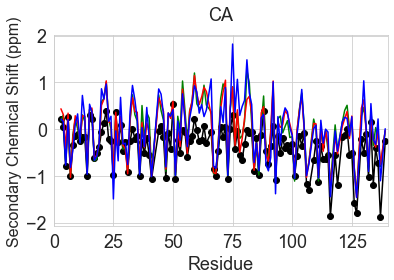

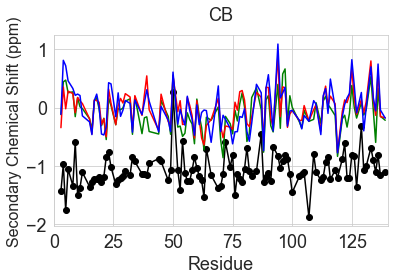

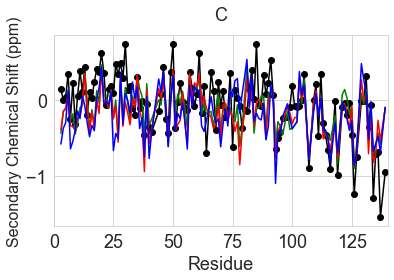

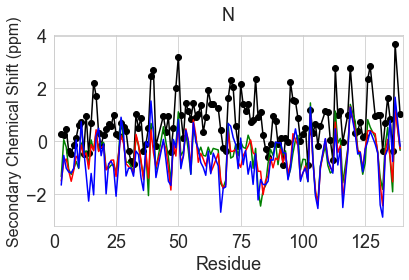

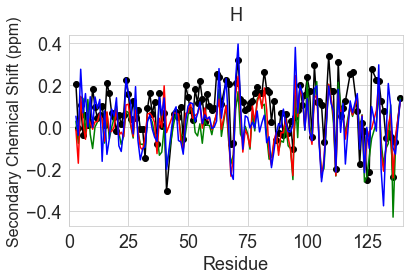

<Figure size 432x288 with 0 Axes>

In [49]:
#Compare Secondary Chemical Shifts
compare_data=['CA','CB','C','N','H']
predictor_error=[0.94,1.14,1.09,2.45,.49]

for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 rc_comp=[]
 exp_comp=[]
 resindex=[]
 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     rc_comp.append(randomcoil[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 np.savetxt('%s/%s.randomcoil.dat'%(outdir,key),np.column_stack((resindex,rc_comp)))

 plt.plot(resindex,exp_comp-rc_comp,color='black',marker='o',label='Experiment')
 plt.plot(resindex,apo_comp-rc_comp,color='green',label='Apo')
 plt.plot(resindex,fas_comp-rc_comp,color='red',label='Fasudil')
 plt.plot(resindex,lig47_comp-rc_comp,color='blue',label='Ligand 47')
 #r'$\alpha
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('Secondary Chemical Shift (ppm)',size='16')
 plt.xticks(fontsize=16)
 plt.yticks(fontsize=16)
 plt.xticks(size='18')
 plt.yticks(size='18')
 #plt.ylim(-2,2)
 plt.xlim(0,140)

 plt.xlabel('Residue',size=18)
 #plt.legend(loc='upper right',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/Compare.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()

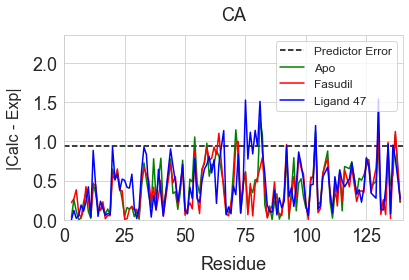

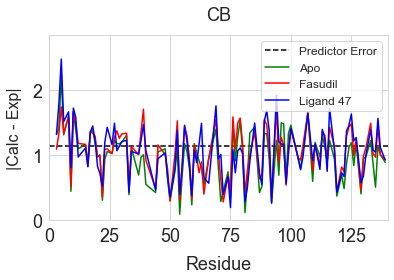

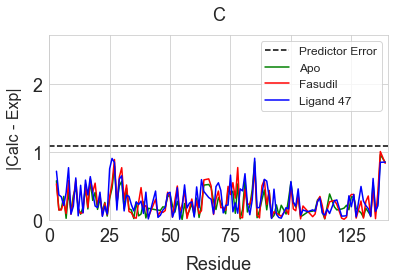

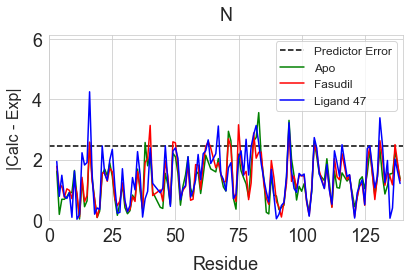

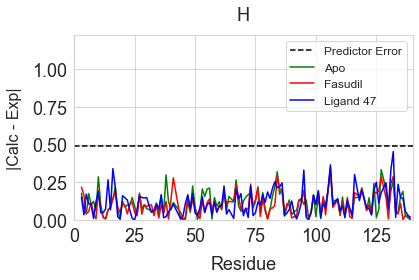

<Figure size 432x288 with 0 Axes>

In [50]:
#Compare Deviations
compare_data=['CA','CB','C','N','H']
predictor_error=[0.94,1.14,1.09,2.45,0.49]
err_d = { 'CA': 0.94,
          'CB': 1.14,
          'C':  1.09,
          'N':  2.45,
          'H': 0.49,
          'HA': 0.25}


for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 exp_comp=[]
 resindex=[]
 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 pred_error=float(err_d[key])
 plt.plot([0,140],[pred_error,pred_error],linestyle='--',color='black',label='Predictor Error')
 plt.plot(resindex,np.absolute(apo_comp-exp_comp),color='green',label='Apo')
 plt.plot(resindex,np.absolute(fas_comp-exp_comp),color='red',label='Fasudil')
 plt.plot(resindex,np.absolute(lig47_comp-exp_comp),color='blue',label='Ligand 47')
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('|Calc - Exp|',size='16',labelpad=10.0)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18)
 #plt.xticks([120,125,130,135,140],size='18')
 plt.yticks(size='18')
 plt.ylim(0,pred_error*2.5)
 plt.xlim(0,140)
 plt.xlabel('Residue',size=18,labelpad=10.0)
 plt.legend(loc='upper right',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/CompareDeviation.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()

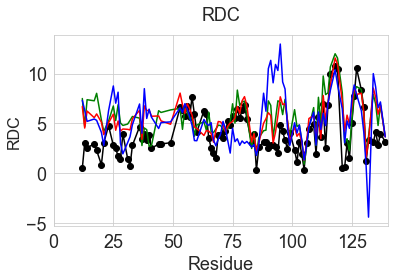

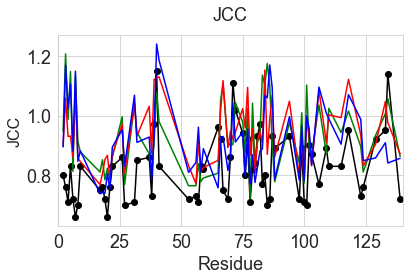

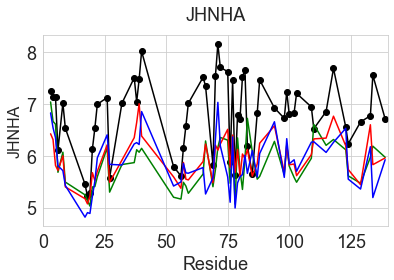

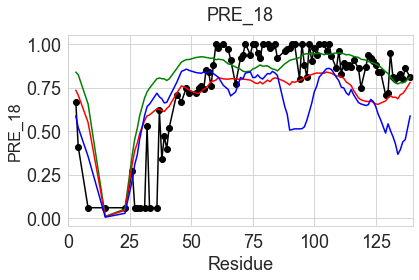

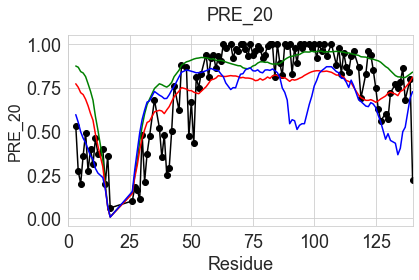

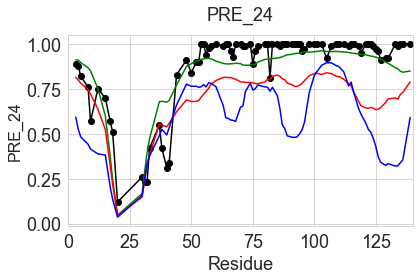

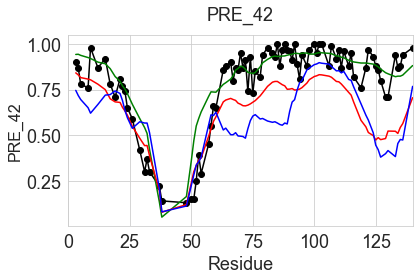

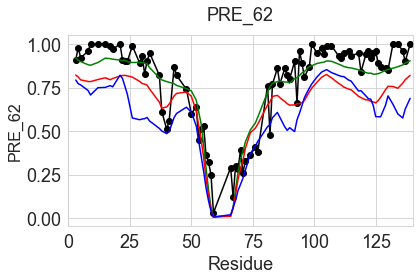

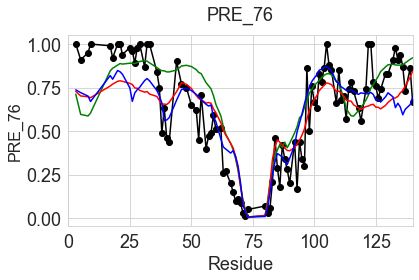

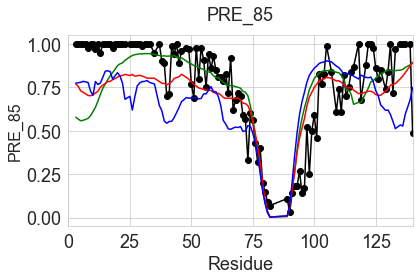

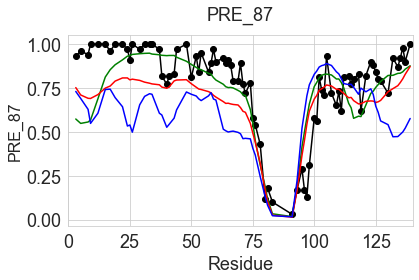

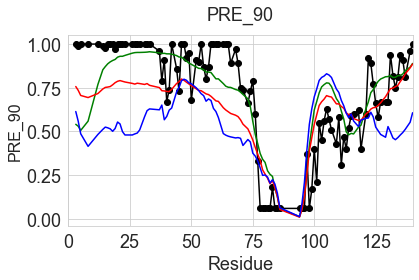

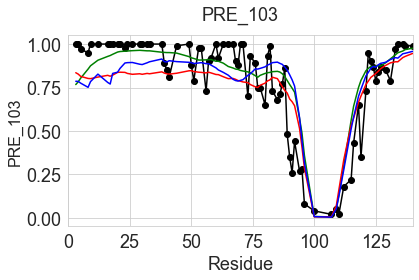

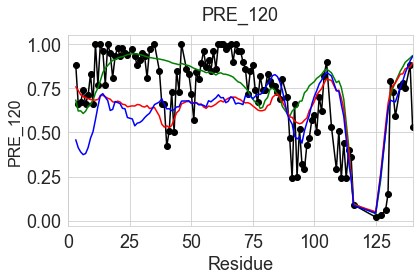

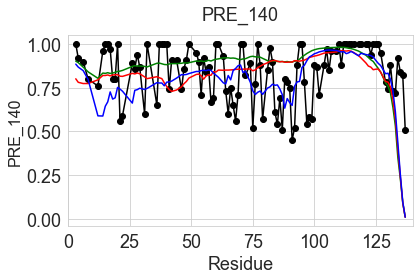

<Figure size 432x288 with 0 Axes>

In [51]:
#Compare Other Data 
compare_data=['RDC','JCC','JHNHA','PRE_18','PRE_20','PRE_24','PRE_42','PRE_62','PRE_76','PRE_85','PRE_87','PRE_90','PRE_103','PRE_120','PRE_140']
#predictor_error=[0.94,1.14,1.09,2.45,.49]

for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 exp_comp=[]
 resindex=[]
 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 plt.plot(resindex,exp_comp,color='black',marker='o',label='Experiment')
 plt.plot(resindex,apo_comp,color='green',label='Apo')
 plt.plot(resindex,fas_comp,color='red',label='Fasudil')
 plt.plot(resindex,lig47_comp,color='blue',label='Ligand 47')
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('%s'%key,size='16')
 plt.xticks(fontsize=16)
 plt.yticks(fontsize=16)
 plt.xticks(size='18')
 plt.yticks(size='18')
 #plt.ylim(-2,2)
 plt.xlim(0,140)

 plt.xlabel('Residue',size=18)
 #plt.legend(loc='upper right',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/Compare.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()

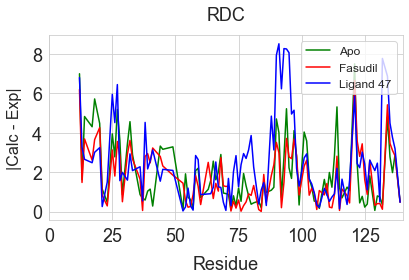

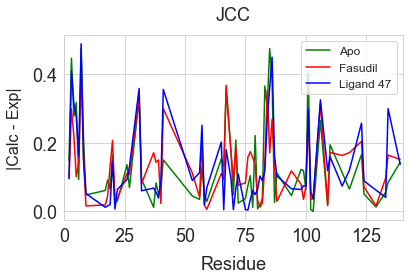

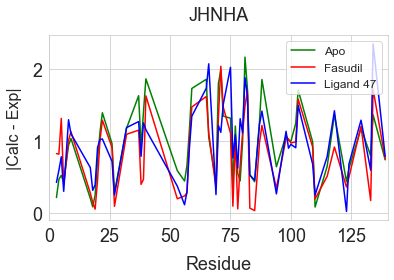

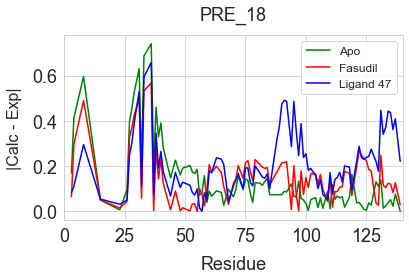

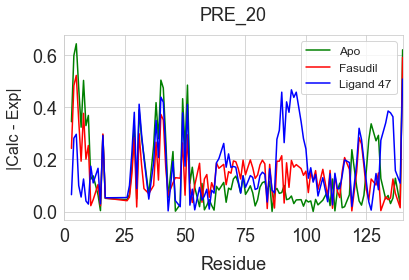

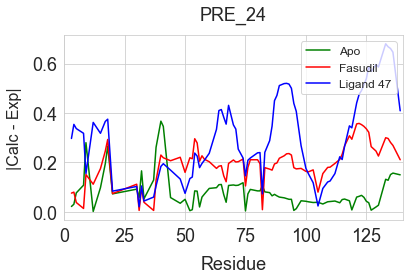

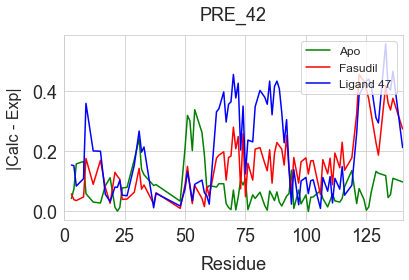

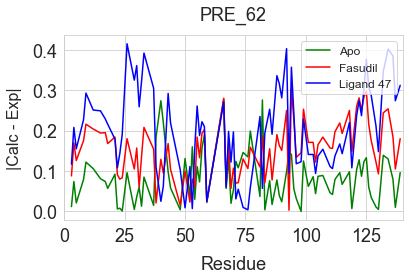

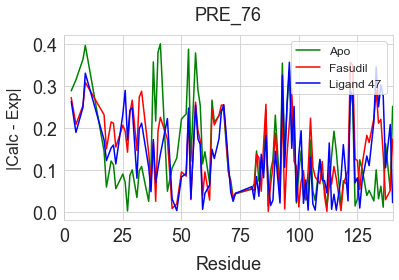

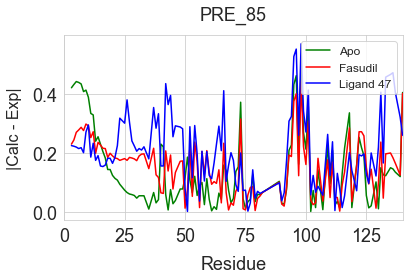

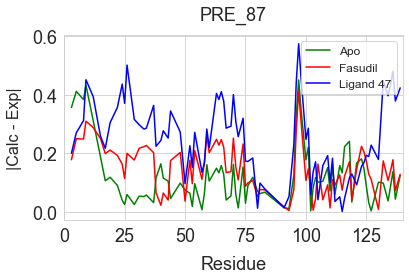

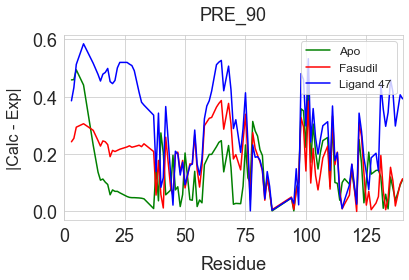

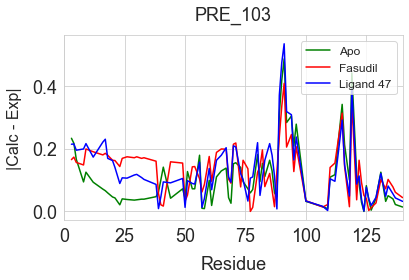

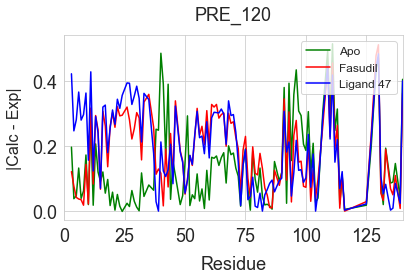

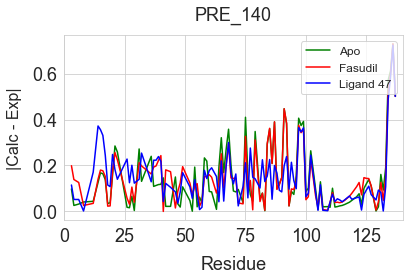

<Figure size 432x288 with 0 Axes>

In [52]:
#Compare Deviations
compare_data=['RDC','JCC','JHNHA','PRE_18','PRE_20','PRE_24','PRE_42','PRE_62','PRE_76','PRE_85','PRE_87','PRE_90','PRE_103','PRE_120','PRE_140']

for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 exp_comp=[]
 resindex=[]

 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 plt.plot(resindex,np.absolute(apo_comp-exp_comp),color='green',label='Apo')
 plt.plot(resindex,np.absolute(fas_comp-exp_comp),color='red',label='Fasudil')
 plt.plot(resindex,np.absolute(lig47_comp-exp_comp),color='blue',label='Ligand 47')
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('|Calc - Exp|',size='16',labelpad=10.0)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18)
 #plt.xticks([120,125,130,135,140],size='18')
 plt.yticks(size='18')
 #plt.ylim(0,pred_error*2.5)
 plt.xlim(0,140)
 plt.xlabel('Residue',size=18,labelpad=10.0)
 plt.legend(loc='upper right',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/CompareDeviation.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()